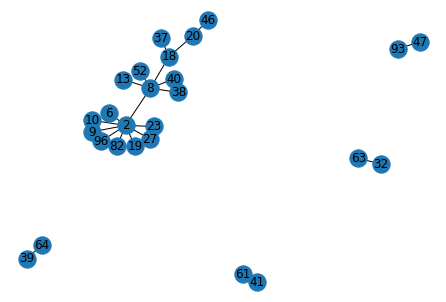

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import networkx as nx
import os
import random
from itertools import islice
import math
G = nx.Graph()
G.add_edges_from([(20, 46), (20, 18), (61, 41), (82, 2), (96, 2), (2, 6), (2, 8), (2, 10), (2, 23), (2, 9), (2, 19), (2, 27), (32, 63), (37, 18), (39, 64), (93, 47), (8, 13), (8, 18), (8, 38), (8, 40), (8, 52)])
# G.remove_node(1)#删去与节点相连的边，但保留另一个节点
# print(list(G.nodes()))
# print(list(G.edges()))
nx.draw(G,with_labels = True)
plt.show()

In [12]:

import math
center_frozen_graph = nx.freeze(G)#G被冷冻为frozen_graph，不会改变
center_unfrozen_graph = nx.Graph(center_frozen_graph)#删除节点在非冷冻图上进行，冷冻图不变
Gc_node = max(nx.connected_components(G), key=len)   #sub_newG的最大连通子图来求Jordan Center
#print(Gc_node)
Gc = center_unfrozen_graph.subgraph(Gc_node)    #改变了G_small，使其成为最大连通子图
Jordan_center  = nx.center(Gc)
print("jc:",Jordan_center)

#无偏中介中心性
bet_cen = nx.betweenness_centrality(G)#节点的中介中心性
deg = G.degree()#节点的度
ub={}
for i in bet_cen.keys():
    if deg[i]!=0:
        ub[i] = bet_cen[i]/(math.pow(deg[i],0.85))
unbiased_betweenness = max(ub, key=lambda x: ub[x])
print("ub:",unbiased_betweenness)

#distance centrality
p = dict(nx.shortest_path_length(G))
d={}
for k,v in p.items():
    s=0
    for i in v.values():
        s = s+i
    d[k] = s
distance_centrality = min(d, key=lambda x: d[x])
print("dc:",distance_centrality)
#dynamic ages
frozen_graph = nx.freeze(G)#G被冷冻为frozen_graph，不会改变
unfrozen_graph = nx.Graph(frozen_graph)#删除节点在非冷冻图上进行，冷冻图不变
AS = nx.adjacency_spectrum(frozen_graph)#邻接矩阵特征值
m = np.real(AS).round(4).max()
all_nodes = G.nodes
#print(all_nodes)
da = {}                             ###!!!!!字典才对
for i in all_nodes:
    unfrozen_graph.remove_node(i)
    AS1 = nx.adjacency_spectrum(unfrozen_graph)
    m1 = np.real(AS1).round(4).max()
    da[i] = float(format(abs(m-m1)/m,'.4f'))   #单独运算看对不对
    unfrozen_graph = nx.Graph(frozen_graph)
dynage = max(da, key=lambda x: da[x])
print("da:",dynage)

jc: [18, 8]
ub: 8
dc: 61
da: 2


In [26]:
from random import choice
jc = [5,0,7]
print(choice(jc))

0
